<a href="https://colab.research.google.com/github/ShokuninSan/deep-q-learning-from-paper-to-code/blob/master/09_frozen_lake_q_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# FrozenLake using Q-learning algorithm

In [0]:
%matplotlib inline

In [0]:
N_EPISODES = 500_000
ALPHA = 0.001
GAMMA = 0.9
EPSILON_START = 1.0
EPSILON_END = 0.01 

In [0]:
class Agent:

    def __init__(self, env):
        self.env = env 
        self.state = None
        self.Q = {
            (s, a): 0 
            for s in range(env.observation_space.n)
            for a in range(env.action_space.n)
        }
        self.random_steps = 0

    def reset(self):
        self.state = self.env.reset()

    def step(self, epsilon):
        action = None
        if np.random.rand() < epsilon:
            # do random action selection
            action = np.random.randint(self.env.action_space.n)
            self.random_steps += 1
        else:
            # do greedy action selection
            action, _ = self.select_action_value(self.state) 

        new_state, reward, is_done, _ = self.env.step(action)

        self.update_action_value(self.state, action, reward, new_state)
        self.state = new_state

        return reward, is_done  

    def update_action_value(self, state, action, reward, new_state):
         _, value = self.select_action_value(new_state)
         self.Q[(state, action)] += ALPHA * (reward + GAMMA * value - self.Q[(state, action)])

    def select_action_value(self, state):
        max_action = None
        max_action_value = -1 
        for (s, a), value in self.Q.items():
            if s == state and value > max_action_value:
                max_action = a
                max_action_value = value
        return max_action, max_action_value

In [0]:
rewards = []
avg_100_rewards = []
env = gym.make('FrozenLake-v0')
agent = Agent(env)
epsilon = EPSILON_START

In [28]:
for episode in range(N_EPISODES):

    agent.reset()

    while True:

        reward, is_done = agent.step(epsilon)

        if is_done:
            rewards.append(reward) 
            break

    epsilon = np.max([epsilon - (EPSILON_START/N_EPISODES), EPSILON_END]) 

    if episode % 100 == 0:
        avg_reward = np.mean(rewards[-100:])
        avg_100_rewards.append(avg_reward)

    if episode % 50000 == 0:
        print(f'Average reward over last episodes was {avg_100_rewards[-1]}, '
              f'epsilon: {epsilon}')


Average reward over last episodes was 0.0, epsilon: 0.999998
Average reward over last episodes was 0.01, epsilon: 0.8999980000026756
Average reward over last episodes was 0.03, epsilon: 0.7999980000053512
Average reward over last episodes was 0.03, epsilon: 0.6999980000080267
Average reward over last episodes was 0.01, epsilon: 0.5999980000107022
Average reward over last episodes was 0.07, epsilon: 0.49999800001337774
Average reward over last episodes was 0.11, epsilon: 0.39999800001327773
Average reward over last episodes was 0.12, epsilon: 0.2999980000131777
Average reward over last episodes was 0.28, epsilon: 0.19999800001307771
Average reward over last episodes was 0.43, epsilon: 0.0999980000129777


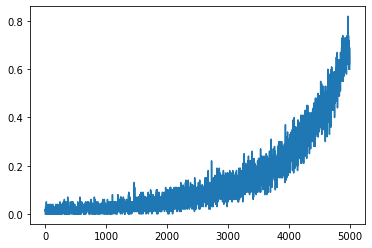

In [29]:
plt.plot(avg_100_rewards)

In [30]:
agent.Q

{(0, 0): 0.06822707001196697,
 (0, 1): 0.06694096907445829,
 (0, 2): 0.06661991168123776,
 (0, 3): 0.05960117300361119,
 (1, 0): 0.04012018961043174,
 (1, 1): 0.043627892148930175,
 (1, 2): 0.04085904374514788,
 (1, 3): 0.06112817969865117,
 (2, 0): 0.07183190912282619,
 (2, 1): 0.06952563144597196,
 (2, 2): 0.07213905273786861,
 (2, 3): 0.05791398405929392,
 (3, 0): 0.03828124800756114,
 (3, 1): 0.03703738083380083,
 (3, 2): 0.031611205830047256,
 (3, 3): 0.05529156229705742,
 (4, 0): 0.09143427843033049,
 (4, 1): 0.06848778263138687,
 (4, 2): 0.0656930103963639,
 (4, 3): 0.04732715163123616,
 (5, 0): 0,
 (5, 1): 0,
 (5, 2): 0,
 (5, 3): 0,
 (6, 0): 0.10465578977439138,
 (6, 1): 0.09243771183464704,
 (6, 2): 0.11414472117449065,
 (6, 3): 0.02337546021062058,
 (7, 0): 0,
 (7, 1): 0,
 (7, 2): 0,
 (7, 3): 0,
 (8, 0): 0.07114792463694164,
 (8, 1): 0.1173894155481094,
 (8, 2): 0.0995852172156324,
 (8, 3): 0.1447035130664591,
 (9, 0): 0.1547695285003095,
 (9, 1): 0.24834498153272486,
 (9, 2)